# Methods for differenciating
Neural networks (NN) are simple mathematical functions stacked on each other, to train a NN we need to process many partial derivatives of each weight with respect to loss to calculate adjustment, so the network improve with each iteration.

We are going to review 2 methods and explain why they are not suitable for this task.

## Finite Difference
We can use the following expression for the derivative with h sufficiently small:

$f'(x_0)=\frac{f(x_0+h)-f(x_0)}{h}$

This method is really easy to implement but the precision depends on how small we want to take h and how complex f is. If we have a simple function this method is functional, but on a NN we have many inputs for few outputs.

This means that we have to evaluate many times the function and on each step there is an acumulated error, so this method is not feasible.

### Finite Difference Implementation
$z=f(x,y)=(\frac{x}{y}+5)^2+x$

We want: $\frac{\partial z}{\partial x}(6,2)$

In [ ]:
def f(x,y):
    return (x/y+5)**2 + x

# Parameters
h=0.1; x_0=6; y_0=2

# Evaluation
partialx=(f(x_0+h,y_0)-f(x_0,y_0))/h
partialy=(f(x_0,y_0+h)-f(x_0,y_0))/h

print("h=0.1 ∂z/∂x =", partialx)
print("h=0.1 ∂z/∂y =", partialy)

print("---------")
# Parameters
h=0.0001; x_0=6; y_0=2

# Evaluation
partialx=(f(x_0+h,y_0)-f(x_0,y_0))/h
partialy=(f(x_0,y_0+h)-f(x_0,y_0))/h

print("h=0.0001 ∂z/∂x =", partialx)
print("h=0.0001 ∂z/∂y =", partialy)


h=0.1 ∂z/∂x = 9.025000000000034
h=0.1 ∂z/∂y = -22.65306122448976
---------
h=0.0001 ∂z/∂x = 9.000025000034384
h=0.0001 ∂z/∂y = -23.99857508265768


## Symbolic Computation
This involves using a package to work on symbolic, the inconvinience is that we can end up with a huge expression and it might take a long time to calculate, and every time we modifty the function we need to recalculate the expression.

### Symbolic Implementation
$z=f(x,y)=(\frac{x}{y}+5)^2+x$

We want: $\frac{\partial z}{\partial x}(6,2)$

In [ ]:
import sympy as sp

x, y, z = sp.symbols('x y z')
sp.init_printing(use_unicode=True)

exppr=(x/y+5)**2+x

# We get the partials
partialx=exppr.diff(x)
partialy=exppr.diff(y)
print("∂z/∂x =", partialx)
print("∂z/∂x(6,2) =", partialx.subs({x:6, y:2}))

print("-----")

print("∂z/∂y =", partialy)
print("∂z/∂y(6,2) =", partialy.subs({x:6, y:2}))

∂z/∂x = 1 + 2*(x/y + 5)/y
∂z/∂x(6,2) = 9
-----
∂z/∂y = -2*x*(x/y + 5)/y**2
∂z/∂y(6,2) = -24


## Forward Automatic Differentation
Consider $f(x,y)=x^2+(x+y)$, first we need to build a computation graph which will ease our task when implementing the automatic differentation. We can think of a computational graph as dividing the function in smaller pieces, in this case:

$z=w_4(w_3(w_0),w_2(w_0,w_1))$

$w_0=x$

$w_1=y$

$w_2=w_0+w_1$

$w_3=w_0^2$

$w_4=w_3+w_2$

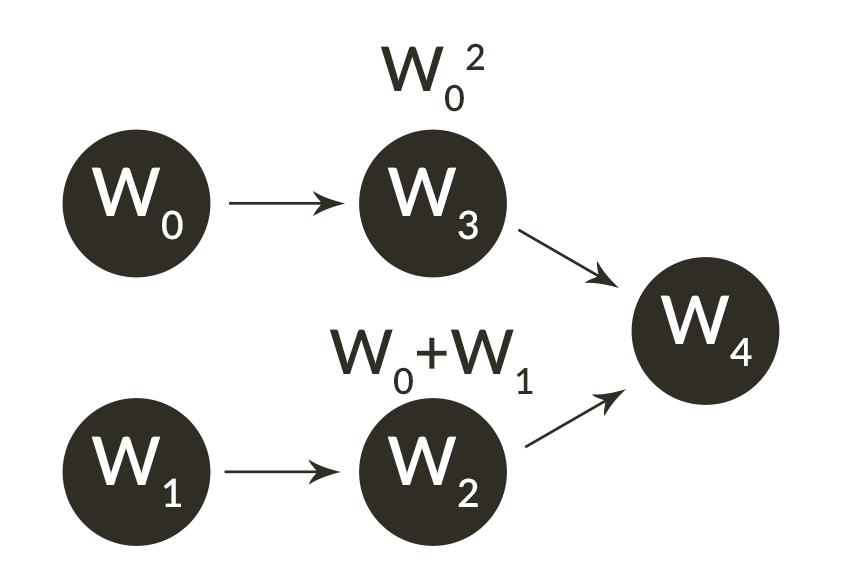


Consider $f(x,y)=x^2+(x+y)$, first we need to build a computation graph which will ease our task when implementing the automatic differentation. We can think of a computational graph as dividing the function in smaller pieces, in this case:

$z=w_4(w_3(w_0),w_2(w_0,w_1))$

$w_0=x$

$w_1=y$

$w_2=w_0+w_1$

$w_3=w_0^2$

$w_4=w_3+w_2$

Recall the chain rule: f(y)=f(y(x)), then:

$\frac{\partial f}{\partial y}=\frac{\partial f}{\partial x}\frac{\partial y}{\partial x}$ or $f'(y)=f'(y(x))\cdot y'(x)$

If we apply this case to our function:

$\frac{\partial z}{\partial x}=\frac{\partial w_4}{\partial w_0}=\frac{\partial w_4}{\partial w_3}\frac{\partial w_3}{\partial w_0}+\frac{\partial w_4}{\partial w_2}\frac{\partial w_2}{\partial w_0}$

$\frac{\partial z}{\partial y}=\frac{\partial w_4}{\partial w_1}=\frac{\partial w_4}{\partial w_3}\frac{\partial w_3}{\partial w_1}+\frac{\partial w_4}{\partial w_2}\frac{\partial w_2}{\partial w_1}$

So the expression result in:

$\frac{\partial z}{\partial x}=1\cdot 2w_0+1\cdot1=2x+1$

$\frac{\partial z}{\partial y}=1 \cdot 0 + 1 \cdot 1=1$

We can see that applying the chain rule, we simplified the problem of calculating the derivative of the whole function $(z)$ to a set of simpler functions $(w_0, w_1,w_2,w_3)$, so the underlying reason why this method works is the chain rule.

If we take a more complex function like $z=f(x,y)=(\frac{x}{y}+5)^2+x$, we do the same dividing the function into smaller pieces, so we get the following table, which the first column are the functions, and the second are the derivatives.

\begin{array}{|c|c|} \hline
w_0=x                       & \dot w_0=1                                                     \\ \hline
w_1=y                       & \dot w_1=0                                                     \\ \hline
w_2=w_0/w_1+5               & \dot w_2 = \frac{\dot w_0\cdot w_1 - \dot w_1\cdot w_0} {w_1^2} \\ \hline
w_3=w_2^2 & \dot w_3 = 2w_2 \dot w_2                      \\ \hline
w_4=w_3+w_0               & \dot w_4= \dot w_3+ \dot w_0  \\ \hline
\end{array}




To get this table we just needed to apply basic derivative rules, which are fast to compute, now if we wanted to calculate: $\frac{\partial z}{\partial x}(6,2)$

We use the table and substitute x=3, y=4 we substitute on each cell and the result is:


\begin{array}{|c|c|} \hline
w_0=6                       & \dot w_0=1                                                     \\ \hline
w_1=2                       & \dot w_1=0                                                     \\ \hline
w_2=6/2+5=8               & \dot w_2 = \frac{1\cdot 2} {4}=1/2  \\ \hline
w_3=8^2 & \dot w_3 =2\cdot 8 \cdot 1/2=8                     \\ \hline
w_4=64+6=70               & \dot w_4= 8+1=9  \\ \hline
\end{array}

So the result is $z(6,2)=70$ and $\frac{\partial z}{\partial x}=9$, if we wanted the partial with respect to y, we just need to change the seed values, this is $(w_0,w_1)=(0,1)$.

### About the seed values
Given the Differntial of f:
$Df(x)=
\begin{pmatrix} \displaystyle\frac{\partial f_1}{\partial x_1}(x)
& \displaystyle\frac{\partial f_1}{\partial x_2}(x)
& \dots
& \displaystyle\frac{\partial f_1}{\partial x_n}(x) \\
\displaystyle\frac{\partial f_2}{\partial x_1}(x)
& \displaystyle\frac{\partial f_2}{\partial x_2}(x)
& \dots & \displaystyle\frac{\partial f_2}{\partial x_n}(x) \\
\vdots & \vdots & \ddots & \vdots \\
\displaystyle\frac{\partial f_m}{\partial x_1}(x)
& \displaystyle\frac{\partial f_m}{\partial x_2}(x)
& \dots & \displaystyle\frac{\partial f_m}{\partial x_n}(x) \\
\end{pmatrix}
=
\begin{pmatrix}
    \nabla f_1(x) \\
    \vdots \\
    \nabla f_m(x)
\end{pmatrix}$

When we set a seed value $(\dot w_0,...,\dot w_n)$ and the values where we want to evaluate the differential $(w_0,...,w_n)$ we get $Df(\dot w_0,..., \dot w_n)(w_0,...,w_n)$. The method of forward automatic differentations allows us to evluate the Differential of f at any point, but we don't get any symbolic expression.

### Forward Automatic Diferenciation on Python
The following code is taken from: https://en.wikipedia.org/wiki/Automatic_differentiation


In [ ]:
import numpy as np

# Print the value and the partial
class ValueAndPartial:
    def __init__(self, value, partial):
        self.value = value
        self.partial = partial

    def toList(self):
        return [self.value, self.partial]

# __add__ allows us to interpret + so when we write x+y=Plus(x,y)
# __mul__ allows us to interpret * so when we write x*y=Multiply(x,y)
class Expression:
    def __add__(self, other):

        if type(other) == int or type(other)==float:
            return Plus(self, Variable(other))
        return Plus(self, other)

    def __mul__(self, other):
        if type(other) == int or type(other)==float:
            return Plus(self, Variable(other))
        return Multiply(self, other)

    def __truediv__(self, other):
        if type(other) == int or type(other)==float:
            return Plus(self, Variable(other))
        return Division(self,other)

class Variable(Expression):
    def __init__(self, value):
        self.value = value

    def evaluateAndDerive(self, variable):
        partial = 1 if self == variable else 0
        return ValueAndPartial(self.value, partial)

class Plus(Expression):
    def __init__(self, expressionA, expressionB):
        self.expressionA = expressionA
        self.expressionB = expressionB

    def evaluateAndDerive(self, variable):
        valueA, partialA = self.expressionA.evaluateAndDerive(variable).toList()
        valueB, partialB = self.expressionB.evaluateAndDerive(variable).toList()
        # Value: g+h Derivative: g' + h'
        return ValueAndPartial(valueA + valueB, partialA + partialB)

class Multiply(Expression):
    def __init__(self, expressionA, expressionB):
        self.expressionA = expressionA
        self.expressionB = expressionB

    def evaluateAndDerive(self, variable):
        valueA, partialA = self.expressionA.evaluateAndDerive(variable).toList()
        valueB, partialB = self.expressionB.evaluateAndDerive(variable).toList()
        # The second value of the return is the multiplication rule
        return ValueAndPartial(valueA * valueB, valueB * partialA + valueA * partialB)

# We can add another class to implement division
class Division(Expression):
    def __init__(self, expressionA, expressionB):
        self.expressionA = expressionA
        self.expressionB = expressionB

    def evaluateAndDerive(self, variable):
        valueA, partialA = self.expressionA.evaluateAndDerive(variable).toList()
        valueB, partialB = self.expressionB.evaluateAndDerive(variable).toList()
        # Value: g/h Derivative: g'*h-h'*g / h^2
        return ValueAndPartial(valueA / valueB, (partialA*valueB - partialB*valueA)/(valueB**2))

# We can add another class to implement sin
class Sin(Expression):
    def __init__(self, expression):
        self.expression = expression

    def evaluateAndDerive(self, variable):
        value, partial = self.expression.evaluateAndDerive(variable).toList()

        return ValueAndPartial(np.sin(value), np.cos(value)*partial)


#### Example 1

Using the previous classes we can do:

$f(x,y)=(x+y)^2 + sin(x+y)$

$\frac{\partial z}{\partial x}(3,4) \approx 14.7539$

In [ ]:
x=Variable(3)
y=Variable(4)
z=(x+y)*(x+y)+Sin(x+y)
xPartial = z.evaluateAndDerive(x)
yPartial = z.evaluateAndDerive(y)
print("∂z/∂x =", xPartial.partial)
print("∂z/∂y =", yPartial.partial)
print("z(3,4)=", xPartial.value)

∂z/∂x = 14.753902254343304
∂z/∂y = 14.753902254343304
z(3,4)= 49.65698659871879


#### Example 2
$z=f(x,y)=(\frac{x}{y}+5)^2+x$

We know: $z(6,2)=70$ and $\frac{\partial z}{\partial x}=17$

In [ ]:
x=Variable(6)
y=Variable(2)
z=(x/y +5)*(x/y +5)+x
xPartial = z.evaluateAndDerive(x)
yPartial = z.evaluateAndDerive(y)
print("∂z/∂x =", xPartial.partial)
print("∂z/∂y =", yPartial.partial)
print("z(6,2)=", xPartial.value)

∂z/∂x = 9.0
∂z/∂y = -24.0
z(6,2)= 70.0


## Reserve Automatic Diferentation

The forward method travels the computational graph from right to left, evaluating and getting the partial derivatives, we can also travel from right to left. We show this with an example:

$z=f(x,y)=(\frac{x}{y}+5)^2+x$
Remember the table given by the computational graph:

\begin{array}{|c|c|} \hline
w_0=x                                                            \\ \hline
w_1=y                                                                        \\ \hline
w_2=w_0/w_1+5              \\ \hline
w_3=w_2^2                    \\ \hline
w_4=w_3+w_0                \\ \hline
\end{array}

We want: $\frac{\partial z}{\partial x}(6,2)$, we do the evaluations:


$z=f(x,y)=(\frac{x}{y}+5)^2+x$

\begin{array}{|c|c|} \hline
w_0=x              & w_0=6                                             \\ \hline
w_1=y                     & w_1 = 2                                                   \\ \hline
w_2=w_0/w_1+5           & w_2=8   \\ \hline
w_3=w_2^2           &w_3=64         \\ \hline
w_4=w_3+w_0          &w_4=70      \\ \hline
\end{array}


Now we go backwards using the known values:

\begin{array}{|c|c|} \hline
w_0=x              & w_0=6    & \frac{\partial z}{\partial w_0}=\frac{\partial z}{\partial w_2}\frac{\partial w_2}{\partial w_0} + \frac{\partial z}{\partial w_4}\frac{\partial w_4}{\partial w_0} = (2\cdot w_2)\cdot \frac{1}{w_1}+1                                       \\ \hline
w_1=y                     & w_1 = 2 & \frac{\partial z}{\partial w_1}=\frac{\partial z}{\partial w_2}\frac{\partial w_2}{\partial w_1}                          =2\cdot w_2 \cdot(\frac{-w_0}{w_1^2})                        \\ \hline
w_2=w_0/w_1+5           & w_2=8 & \frac{\partial z}{\partial w_2}=\frac{\partial z}{\partial w_3}\frac{\partial w_3}{\partial w_2}=2\cdot w_2   \\ \hline
w_3=w_2^2           &w_3=64        & \frac{\partial z}{\partial w_3}=\frac{\partial z }{\partial w_4}\frac{\partial w_4}{\partial w_3}=1 \\ \hline
w_4=w_3+w_0          &w_4=70 & \frac{\partial z}{\partial w_4}=1 (seed)      \\ \hline
\end{array}

Using the evaluations we finally get:
\begin{array}{|c|c|} \hline
w_0=x              & w_0=6    & \frac{\partial z}{\partial w_0}=\frac{\partial z}{\partial w_2}\frac{\partial w_2}{\partial w_0} + \frac{\partial z}{\partial w_4}\frac{\partial w_4}{\partial w_0} = (2\cdot w_2)\cdot \frac{1}{w_1}+1= \frac{16}{2}+1=9                                      \\ \hline
w_1=y                     & w_1 = 2 & \frac{\partial z}{\partial w_1}=\frac{\partial z}{\partial w_2}\frac{\partial w_2}{\partial w_1}                          =2\cdot w_2 \cdot(\frac{-w_0}{w_1^2})=2\cdot 8 \cdot (\frac{-6}{4})=-24                        \\ \hline
w_2=w_0/w_1+5           & w_2=8 & \frac{\partial z}{\partial w_2}=\frac{\partial z}{\partial w_3}\frac{\partial w_3}{\partial w_2}=2\cdot w_2=16   \\ \hline
w_3=w_2^2           &w_3=64        & \frac{\partial z}{\partial w_3}=\frac{\partial z }{\partial w_4}\frac{\partial w_4}{\partial w_3}=1 \\ \hline
w_4=w_3+w_0          &w_4=70 & \frac{\partial z}{\partial w_4}=1 (seed)      \\ \hline
\end{array}


This means:

$\frac{\partial z}{w_0}=\frac{\partial z}{\partial x}=9$

$\frac{\partial z}{w_1}=\frac{\partial z}{\partial y}=-24$

### Python Implementation for Reverse Automatic Differentation
Reference: https://en.wikipedia.org/wiki/Automatic_differentiation

In [ ]:
import numpy as np

# __add__ allows us to interpret + so when we write x+y=Plus(x,y)
# __mul__ allows us to interpret * so when we write x*y=Multiply(x,y)
class Expression:
    def __add__(self, other):

        if type(other) == int or type(other)==float:
            return Plus(self, Variable(other))
        return Plus(self, other)

    def __mul__(self, other):
        if type(other) == int or type(other)==float:
            return Plus(self, Variable(other))
        return Multiply(self, other)

    def __truediv__(self, other):
        if type(other) == int or type(other)==float:
            return Plus(self, Variable(other))
        return Division(self,other)

class Variable(Expression):
    def __init__(self, value):
        self.value = value
        self.partial = 0

    def evaluate(self):
        pass

    def derive(self, seed):
        self.partial += seed

class Plus(Expression):
    def __init__(self, expressionA, expressionB):
        self.expressionA = expressionA
        self.expressionB = expressionB
        self.value = None

    def evaluate(self):
        self.expressionA.evaluate()
        self.expressionB.evaluate()
        self.value = self.expressionA.value + self.expressionB.value

    def derive(self, seed):
        self.expressionA.derive(seed)
        self.expressionB.derive(seed)

class Multiply(Expression):
    def __init__(self, expressionA, expressionB):
        self.expressionA = expressionA
        self.expressionB = expressionB
        self.value = None

    def evaluate(self):
        self.expressionA.evaluate()
        self.expressionB.evaluate()
        self.value = self.expressionA.value * self.expressionB.value

    def derive(self, seed):
        self.expressionA.derive(self.expressionB.value * seed)
        self.expressionB.derive(self.expressionA.value * seed)

# We can add another class to implement division
class Division(Expression):
    def __init__(self, expressionA, expressionB):
        self.expressionA = expressionA
        self.expressionB = expressionB
        self.value=None

    def evaluate(self):
        self.expressionA.evaluate();
        self.expressionB.evaluate();
        self.value=self.expressionA.value / self.expressionB.value

    def derive(self, seed):
        self.expressionA.derive(seed* (1/self.expressionB.value))
        self.expressionB.derive(seed*(-self.expressionA.value/(self.expressionB.value**2)))

# We can implement the Sin
class Sin(Expression):
    def __init__(self, expression):
        self.expression = expression
        self.value=None

    def evaluate(self):
        self.expression.evaluate();
        self.value=np.sin(self.expression.value)

    def derive(self, seed):
        self.expression.derive(seed*np.cos(self.expression.value))


#### Example 1

Using the previous classes we can do:

$f(x,y)=(x+y)^2 + sin(x+y)$

$\frac{\partial z}{\partial x}(3,4) \approx 14.7539$

In [ ]:
x=Variable(3)
y=Variable(4)
z=(x+y)*(x+y)+Sin(x+y)
z.evaluate()
print("z =", z.value)
z.derive(1)
print("∂z/∂x =", x.partial)
print("∂z/∂y =", y.partial)

z = 49.65698659871879
∂z/∂x = 14.753902254343304
∂z/∂y = 14.753902254343304


#### Example 2
$z=f(x,y)=(\frac{x}{y}+5)^2+x$

In [ ]:
x=Variable(6)
y=Variable(2)
z=(x/y +5)*(x/y +5)+x
z.evaluate()
print("z =", z.value)
z.derive(1)
print("∂z/∂x =", x.partial)
print("∂z/∂y =", y.partial)

z = 70.0
∂z/∂x = 9.0
∂z/∂y = -24.0


## Conclusion
Which of these two types should be used depends on the sweep count. The computational complexity of one sweep is proportional to the complexity of the original code.

- Forward accumulation is **more efficient than reverse accumulation for functions $f : R^n → R^m$ with n ≪ m** as only n sweeps are necessary, compared to m sweeps for reverse accumulation.
- Reverse accumulation is **more efficient than forward accumulation for functions $f : R^n → R^m$ with n ≫ m** as only m sweeps are necessary, compared to n sweeps for forward accumulation.

In a NN we have n≫m so reserve accumulation is the preffered method to get the partials with respect to the input.